<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/reach_gw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Carli Beisel

Date Created: August 2024

Purpose: Estimate GW recharge to drainages in Mason

In [5]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd # to work with dataframe
import os # for file paths
import glob # read in a folder of csv
import numpy as np # basic statistics
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
## --------------- ##
##    LOAD DATAS   ##
## --------------- ##

gw = pd.read_csv('/content/drive/MyDrive/Data/Mason/data_input/groundwater/TVGWFM - Mason Inflow.csv')

year = gw['year']
flow = gw['flow(cfs)']

In [67]:
# make year and months integers
gw['year'] = pd.to_numeric(gw['year'], errors='coerce').astype('Int64')
gw['month'] = pd.to_numeric(gw['month'], errors='coerce').astype('Int64')
print(gw[['year', 'month']].head())

gw.to_csv(file_path, index=False)

   year  month
0  <NA>   <NA>
1  1986      1
2  1986      2
3  1986      3
4  1986      4


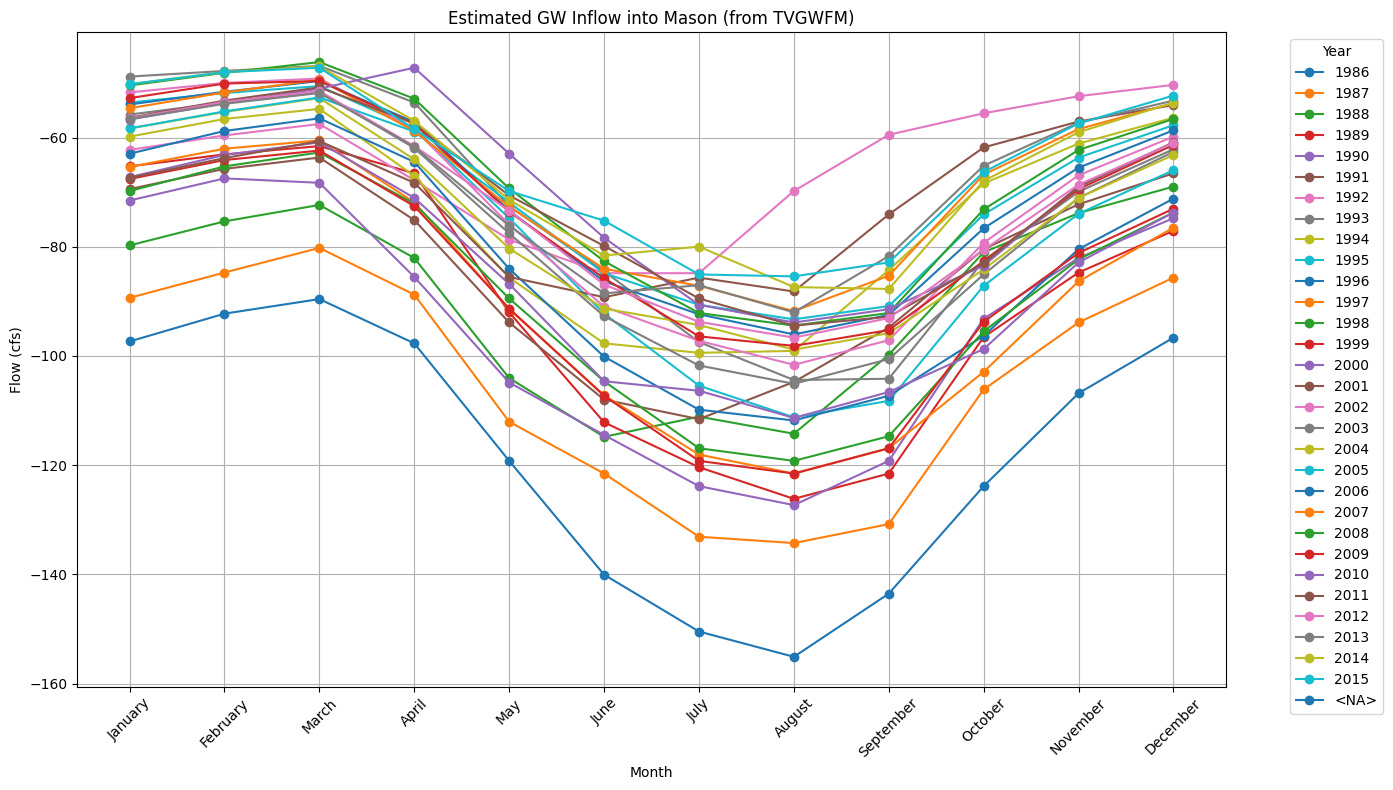

In [68]:
## --------------- ##
##    All Years    ##
## --------------- ##

# Create a mapping from month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace the numeric month values with the month names
gw['month'] = gw['month'].map(month_mapping)

# Convert the month column to a categorical type to preserve the order
gw['month'] = pd.Categorical(gw['month'], categories=list(month_mapping.values()), ordered=True)

# Sort the DataFrame by year and then by month for better plotting
gw.sort_values(by=['year', 'month'], inplace=True)

# Plotting
plt.figure(figsize=(14, 8))

# Plot each year's flow across months
for year in gw['year'].unique():
    year_data = gw[gw['year'] == year]
    plt.plot(year_data['month'], year_data['flow(cfs)'], marker='o', label=str(year))

plt.title('Estimated GW Inflow into Mason (from TVGWFM)')
plt.xlabel('Month')
plt.ylabel('Flow (cfs)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

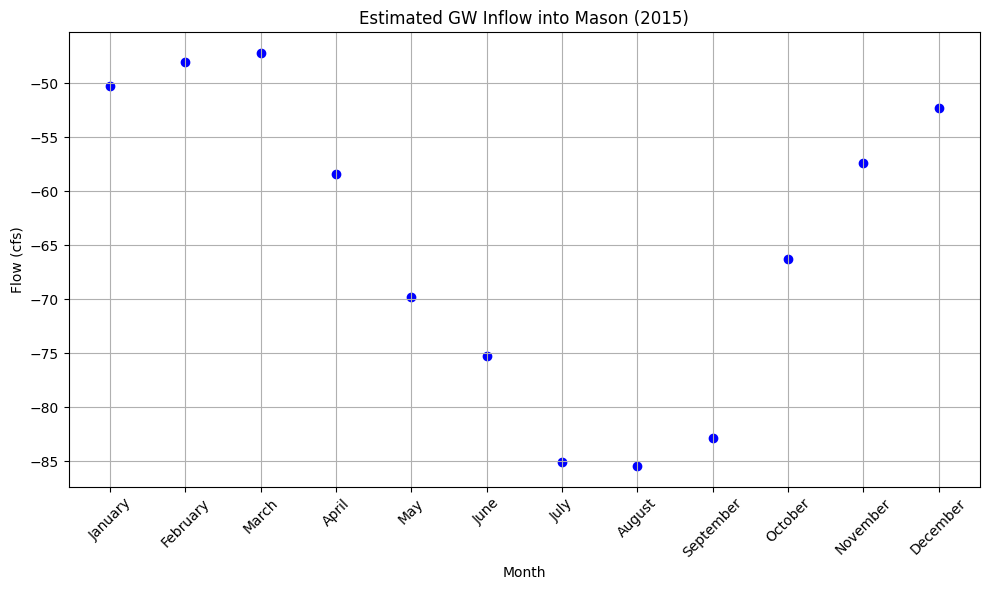

In [63]:
## --------------- ##
##       2015      ##
## --------------- ##

# filter the DataFrame for the year 2015
gw_2015 = gw[gw['year'] == 2015]

plt.figure(figsize=(10, 6))
plt.scatter(gw_2015['month'], gw_2015['flow(cfs)'], color='b')

plt.title('Estimated GW Inflow into Mason (2015)')
plt.xlabel('Month')
plt.ylabel('Flow (cfs)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()